In [14]:
import pandas as pd
data= pd.read_csv('ms2.csv', encoding='utf8',engine='python')
data['deal']=data['deal'].apply(lambda x:x.replace('+', '').replace('万', '0000'))
data['price'].replace('¥', '', regex=True, inplace=True)
data['province']=data.location.apply(lambda x:x.split()[0])
data['city']=data.location.apply(lambda x:x.split()[0] if len(x)<4 else x.split()[1])
data.drop('location',axis=1, inplace=True)

In [15]:
#获得中国全部的省级单位名称，找到全部的省级单位
#将每一个地址的省份提取出来，剩下的就是城市
pro_list=['北京',
 '天津',
 '上海',
 '重庆',
 '河北',
 '山西',
 '辽宁',
 '吉林',
 '黑龙江',
 '江苏',
 '浙江',
 '安徽',
 '福建',
 '江西',
 '山东',
 '河南',
 '湖北',
 '湖南',
 '广东',
 '海南',
 '四川',
 '贵州',
 '云南',
 '陕西',
 '甘肃',
 '青海',
 '台湾',
 '内蒙古',
 '广西',
 '西藏',
 '宁夏',
 '新疆',
 '香港',
 '澳门']


def get_province(address):
    for i in pro_list:
        if i in address:
            province=i
            return province

#data['city']=data['city'].apply(get_city)
data['province']=data['province'].apply(get_province)


In [16]:
#数据类型转化
data['price']=data.price.astype('float64')
data['deal'] =data.deal.astype('int')
for i in ['province','city']:
    data[i]=data[i].astype('category')


In [20]:
#####
# 标题可视化
import jieba, re
import collections                  # 词频统计库
# 读取title，并连接成长文本
file = data.loc[:,'title'].dropna(how='any')  # 去掉空值
string_data1 = ''.join(i for i in file)  # 把所有字符串连接成一个长文本
# 文本预处理
#pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式（空格等）
#pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|【|】[a-zA-Z0-9]"') # 定义正则表达式匹配模式（空格等）
pattern = re.compile(u'[\t|\n|\.|\-|\:|\;|\)|\(|\?|【|】|a-zA-Z0-9|\"]') # 定义正则表达式匹配模式（空格等）
string_data1 = re.sub(pattern, '', string_data1)     # 将符合模式的字符去除
# 文本分词
seg_list_exact = jieba.cut(string_data1, cut_all=False, HMM=True)    # 精确模式分词+HMM
object_list= []
# 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
with open('stop_words2.txt', 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in seg_list_exact:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表
        

# 词频统计
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(40)    # 获取前number个最高频的词
word_count = pd.DataFrame(word_counts_top,columns=['word', 'count'])
word_count
#包装看（整箱受欢迎>袋>礼盒）、、吃法（即食》速食（泡面燕麦那些，））
#口味上（卤味>香辣>麻辣）

,word,count
0,卤味,1644
1,休闲,1582
2,特产,1400
3,即食,1065
4,整箱,959
5,熟食,921
6,速食,850
7,鸭,725
8,网红,625
9,早餐,581


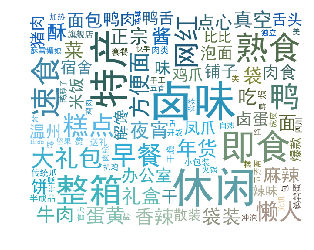

In [45]:
#####
# 词云图
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import numpy as np # numpy数据处理库
import matplotlib.pyplot as plt # 图像展示库
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mask = np.array(Image.open('E:\qqsj\ms\背景2.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='SimHei.ttf', # 设置字体格式
    background_color="white",  # 背景颜色
    mask=mask, # 设置背景图
    max_words=100, # 最多显示词数
    max_font_size=100, # 字体最大值
    random_state=50,  # 设置有多少种随机生成状态，即有多少种配色
    width=2500, height=1920,
    margin=3,  # 设置图片默认的大小,margin为词语边缘距离
)
wc.generate_from_frequencies(word_counts) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.axis("off")  

plt.imshow(wc) # 显示词云

'天悦名坊杭州特产豆腐皮即食素食佛家纯素肉素烧鹅素肠豆制品食品自热米饭速食食品冲泡米方便快餐免蒸煮即食泡饭宿舍大份量脂肪袋桂林米粉正宗速食鲜米线袋装螺蛳粉湿米粉广西鲜米粉特产商用卤味觉醒慢烤鸡胸肉干辣味吃货零食办公室鸡肉脯小吃夜宵低脂轻卡自嗨锅自热米饭煲仔饭懒人速食食品早餐午餐夜宵方便即食快餐料理轩妈家蛋黄酥礼盒雪媚娘糕点点心零食小吃休闲食品早餐大礼包送礼首发开小灶东北辣白菜自热米饭方便速食盒装整箱即食煲仔饭食品轩妈家蛋黄酥糕点雪媚娘办公室零食点心甜品零食小吃休闲食品早餐王小卤虎皮凤爪鸡爪子小零食卤味五香休闲*囤货装康师傅方便面桶装泡面整箱批发红烧牛肉面香辣老坛酸菜速食食品康师傅方便面泡面整箱袋装红烧牛肉面老坛酸菜藤椒批发速食食品良品铺子蛋黄酥雪媚娘网红零食小吃休闲食品早餐面包糕点整箱礼物轩妈蛋黄酥年货礼盒大礼包枚新年礼盒糕点麻薯休闲零食礼包良品铺子鸭脖甜辣卤味熟食小吃休闲食品锁鲜小包装麻辣解馋小零食百草味肉松饼早餐面包传统糕点网红休闲零食小吃美食点心整箱藤桥牌精品大鸭舌 温州特产小吃熟食 卤味休闲零食即食鸭舌头三只松鼠_鸭脖肉类熟食卤味小零食小吃鸭肉即食充饥夜宵自嗨锅自热米饭整箱煲仔饭方便速食懒人食品旗舰店官网正品同款满减三只松鼠猪尾巴休闲零食香辣卤味小吃熟食大豫竹方便面整箱袋装香辣牛肉面干脆面干吃面泡面速食怀旧零食品脆司令干脆面豫竹方便面整箱袋装掌心面干吃面怀旧零食速食食品百草味零食大礼包礼盒装休闲夜宵充饥送女友小吃大全各种美食男友潘祥记玫瑰花饼干零食蛋黄酥早餐点心美食糕点礼盒云南特产鲜花饼三只松鼠巨型零食大礼包小吃休闲食品超大全美食情人节送女友礼物零食大礼包麻辣网红小吃休闲食品里奈零食卤味肉类年货整箱鸭脖王小卤虎皮凤爪*袋大分量卤味鸡爪子秒脱骨即食网红解馋零食王小卤虎皮凤爪*袋秒脱骨大鸡爪子网红卤味解馋小零食旗舰店自嗨锅自热米饭盒整箱煲仔饭自热饭方便速热速食懒人食品一箱比比赞龙岩泡鸭爪福建特产鸭掌辣味网红鸭脚零食小吃休闲卤味食品香烤虾干即食虾干大号对虾炭烤海鲜网红干货零食小吃解馋美食特产莫小仙麻辣重庆小面速食食品方便面整箱懒人食品冲泡酸辣粉桶装诚卡魔芋面代餐饱腹主食食品低卡脂肪魔芋粉丝热量方便速食即食温州特产初旭酱鸭舌头生大条克酒店冷盘腊鸭舌卤味散装年货零食大礼包麻辣味网红年货卤味肉类香辣鸭脖零食小吃休闲食品解馋三只松鼠零食大礼包送女友情人节巨型礼盒坚果超大全

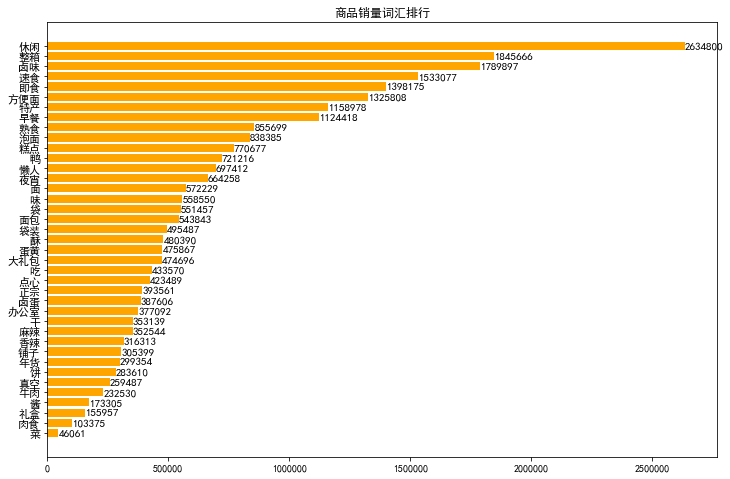

In [6]:
#####
# 销量统计
import numpy as np
title = data.title.values.tolist()  # 转为list
title_s = []
for line in title:#【】title转为二维list：title_s
    title_cut = jieba.lcut(line)
    title_s.append(title_cut)
ws_sum = []
for w in word_count.word:
    i = 0
    s_list = []
    for t in title_s:
        if w in t:
            s_list.append(data.deal[i])
        i += 1
    ws_sum.append(sum(s_list))
  

df_sum = pd.DataFrame({'ws_sum': ws_sum})#把列表ws_sum转为数据框
df_word_sum = pd.concat([word_count, df_sum], axis=1, ignore_index=True)
df_word_sum.columns = ['word', 'count', 'ws_sum']  # 词语，出现次数，包含该词语的商品销量

df_word_sum.drop(8, axis=0, inplace=True)  # 删除“空格”词所在的8行
df_word_sum.sort_values('ws_sum', inplace=True, ascending=True)  # 升序排列
df_ws = df_word_sum.tail(80)

index = np.arange(df_ws.word.size)
plt.figure(figsize=(12, 8))
plt.barh(index, df_ws.ws_sum, align='center',color='orange',)
plt.yticks(index, df_ws.word, fontsize=11)

# 添加数据标签
for y, x in zip(index, df_ws.ws_sum):
    plt.text(x, y, '%.0f' % x, ha='left', va='center',
             fontsize=11)  # ha参数有【center，left，right】，va参数有【top，bottom，center，baseline】
    
plt.title('商品销量词汇排行',fontsize=12)
plt.savefig('店铺销量词汇排行.png')


价格在150以下的商品占比：0.913


Text(0.5,1,'不同价格对应的商品数量分布')

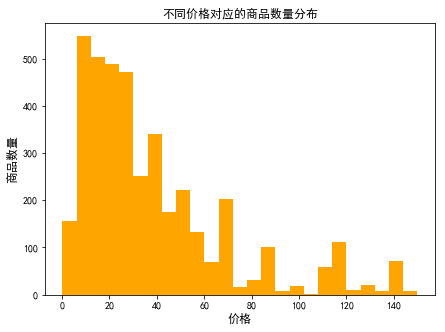

In [7]:
######
# 价格分布
# 不同价格对应的商品数量分布
data_p=data[data['price']<150]
print('价格在150以下的商品占比：%.3f'%(len(data_p)/len(data)))
plt.figure(figsize=(7,5))
plt.hist(data_p['price'],bins=25,color='orange')
plt.xlabel('价格',fontsize=12)
plt.ylabel('商品数量',fontsize=12)
plt.title('不同价格对应的商品数量分布',fontsize=12)
# 总结：价格在150以下的商品占比：0.913
#定价在10到30元的商品数量较多

销量在200~20000之间的商品占比：0.572


Text(0.5,1,'不同销量对应的商品数量分布')

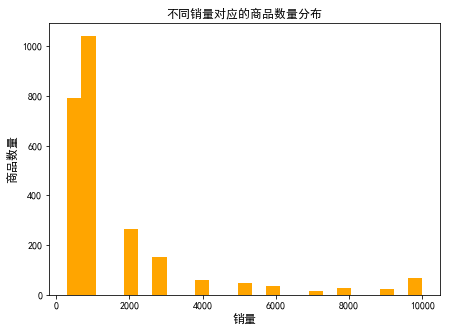

In [8]:
# 不同销量对应的商品数量分布
data_s=data[data['deal']<20000]
data_s=data_s[data_s['deal']>200]
print('销量在200~20000之间的商品占比：%.3f'%(len(data_s)/len(data)))
plt.figure(figsize=(7,5))
plt.hist(data_s['deal'],bins=25,color='orange')
plt.xlabel('销量',fontsize=12)
plt.ylabel('商品数量',fontsize=12)
plt.title('不同销量对应的商品数量分布',fontsize=12)
# 总结：销量在200~20000之间的商品占比：0.572
#销量越高商品数量越少，（强者永远是少数）

Text(0.5,1,'不同价格区间商品的平均销量')

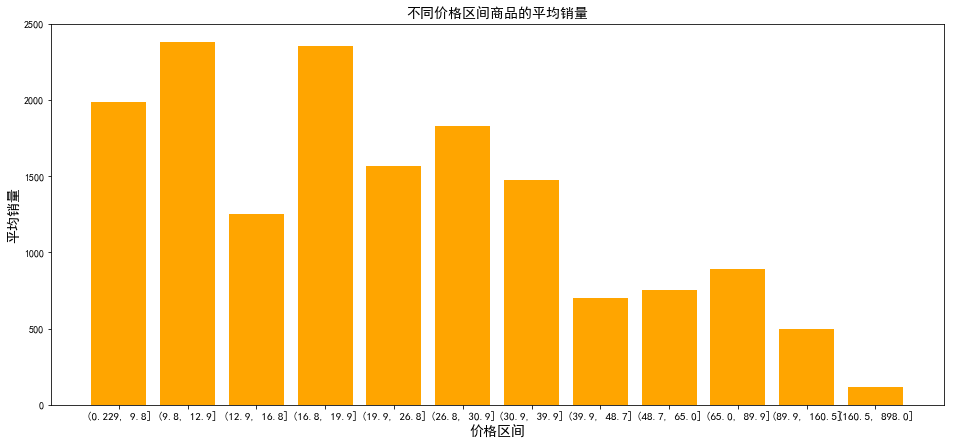

In [9]:
# 不同价格区间商品的平均销量
data['group']=pd.qcut(data.price,12)#用qcut将price分成12组
df_group=data.group.value_counts().reset_index()
df_sg=data[['deal','group']].groupby('group').mean().reset_index()#以group列进行分类，求deal销量的均值
index=np.arange(df_sg.group.size)#绘柱形图
plt.figure(figsize=(16,7))
plt.bar(index,df_sg.deal,color='orange')
plt.xticks(index,df_sg.group,fontsize=11)
plt.xlabel('价格区间',fontsize=14)
plt.ylabel('平均销量',fontsize=14)
plt.title('不同价格区间商品的平均销量',fontsize=14)
#【9.8,12.9】【16.8,12.9】这两个价格区间的销量最好，售价在这两个区间附近的可以学习

Text(0.5,1,'价格对销量的影响')

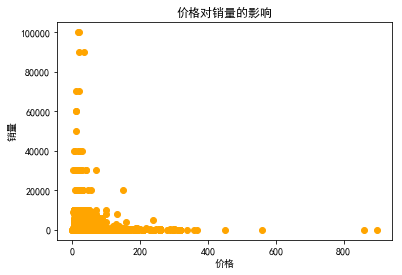

In [10]:
# 价格对销量的影响
fig,ax=plt.subplots()
ax.scatter(data['price'],data['deal'],color='orange')
ax.set_xlabel('价格')
ax.set_ylabel('销量')
ax.set_title('价格对销量的影响')
#大致能看出15-50元价格的商品销量都不错，50往上价格的就不太乐观了，

Text(0.5,1,'价格对销售额的影响')

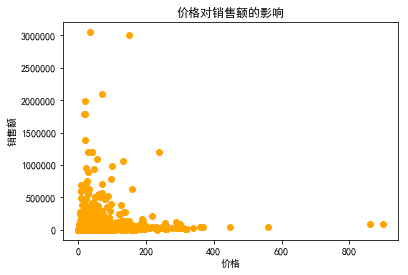

In [11]:
# 价格对销售额的影响
data['GMV']=data['price']*data['deal']
fig,ax=plt.subplots()
ax.scatter(data['price'],data['GMV'],color='orange')
ax.set_xlabel('价格')
ax.set_ylabel('销售额')
ax.set_title('价格对销售额的影响')
#大致能看出15-50元价格的商品销售额都不错，50往上价格的就不太乐观了，
#和上面价格销量影响差不多因为GMV=p*d，薄利多销靠谱点

Text(0.5,1,'不同省份的商品数量分布')

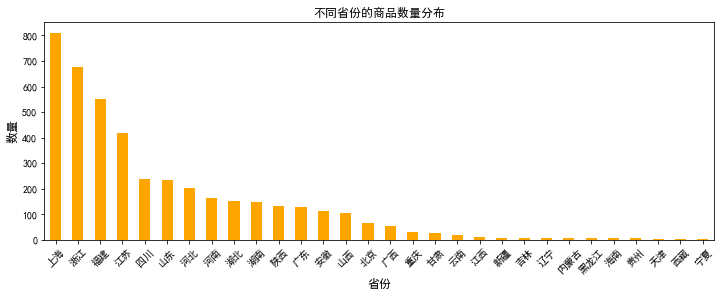

In [12]:
# 地域分布
# 不同省份的商品数量分布
plt.figure(figsize=(12,4))
data['province'].value_counts().plot(kind='bar',color='orange')
plt.xticks(rotation=0)    #让字体横向分布
plt.xlabel('省份',fontsize=12)
plt.ylabel('数量',fontsize=12)
plt.xticks(rotation=45)
plt.title('不同省份的商品数量分布',fontsize=12)
#特意淘宝看了看，猜想是一线城市仓库多有进口的之类的

In [13]:
data.province

0       广东
1       四川
2       广西
3       广东
4       江苏
        ..
4398    上海
4399    河南
4400    陕西
4401    江苏
4402    山东
Name: province, Length: 4403, dtype: category
Categories (30, object): ['上海', '云南', '内蒙古', '北京', ..., '辽宁', '重庆', '陕西', '黑龙江']

Text(0.5,1,'不同省份的商品平均销量分布')

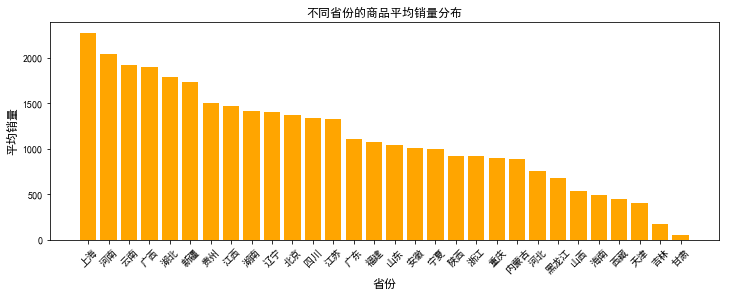

In [15]:
# 不同省份的商品平均销量分布
pro_sales=data.pivot_table(index='province',values='deal',aggfunc=np.mean)   #分类求均值
pro_sales.sort_values('deal',inplace=True,ascending=False)
pro_sales=pro_sales.reset_index()
index=np.arange(pro_sales.deal.size)
plt.figure(figsize=(12,4))
plt.bar(index,pro_sales.deal,color='orange')
plt.xticks(index,pro_sales.province,rotation=0)    #让字体横向分布
plt.xlabel('省份',fontsize=12)
plt.ylabel('平均销量',fontsize=12)
plt.xticks(rotation=45)
plt.title('不同省份的商品平均销量分布',fontsize=12)

In [16]:
import pandas as pd
data= pd.read_csv('ms2.csv', encoding='utf8',engine='python')
data['deal']=data['deal'].apply(lambda x:x.replace('+', '').replace('万', '0000'))
data['price'].replace('¥', '', regex=True, inplace=True)
data['province']=data.location.apply(lambda x:x.split()[0])
data['city']=data.location.apply(lambda x:x.split()[0] if len(x)<4 else x.split()[1])
data.drop('location',axis=1, inplace=True)

In [17]:
#获得中国全部的省级单位名称，找到全部的省级单位
#将每一个地址的省份提取出来，剩下的就是城市
pro_list=['北京',
 '天津',
 '上海',
 '重庆',
 '河北',
 '山西',
 '辽宁',
 '吉林',
 '黑龙江',
 '江苏',
 '浙江',
 '安徽',
 '福建',
 '江西',
 '山东',
 '河南',
 '湖北',
 '湖南',
 '广东',
 '海南',
 '四川',
 '贵州',
 '云南',
 '陕西',
 '甘肃',
 '青海',
 '台湾',
 '内蒙古',
 '广西',
 '西藏',
 '宁夏',
 '新疆',
 '香港',
 '澳门']


def get_province(address):
    for i in pro_list:
        if i in address:
            province=i
            return province

#data['city']=data['city'].apply(get_city)
data['province']=data['province'].apply(get_province)


In [18]:
#数据类型转化
data['price']=data.price.astype('float64')
data['deal'] =data.deal.astype('int')
for i in ['province','city']:
    data[i]=data[i].astype('category')

In [19]:
#####
# 标题可视化
import jieba, re
import collections                  # 词频统计库
# 读取title，并连接成长文本
file = data.loc[:,'shop'].dropna(how='any')  # 去掉空值
string_data = ''.join(i for i in file)  # 把所有字符串连接成一个长文本
# 文本预处理
#pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式（空格等）
#pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|【|】[a-zA-Z0-9]"') # 定义正则表达式匹配模式（空格等）
pattern = re.compile(u'[\t|\n|\.|\-|\:|\;|\)|\(|\?|【|】|a-zA-Z0-9|\"]') # 定义正则表达式匹配模式（空格等）
string_data = re.sub(pattern, '', string_data)     # 将符合模式的字符去除
# 文本分词
file_userdict = 'test.txt' #此处文件名为用户自定义的文件名，内容为不想被分开的词
jieba.load_userdict(file_userdict)
seg_list_exact = jieba.cut(string_data, cut_all=False, HMM=True)    # 精确模式分词+HMM
object_list= []
# 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
with open('stop_words.txt', 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in seg_list_exact:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表
        

# 词频统计
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(11)    # 获取前number个最高频的词
word_count = pd.DataFrame(word_counts_top,columns=['word', 'count'])
word_count
#包装看（整箱受欢迎>袋>礼盒）、、吃法（即食》速食（泡面燕麦那些，））
#口味上（卤味>香辣>麻辣）

,word,count
0,旗舰店,1730
1,专营店,572
2,天猫超市,441
3,官方旗舰店,216
4,比比赞,178
5,欧贝拉,163
6,超市,154
7,五芳斋,138
8,够实汇,137
9,专卖店,113


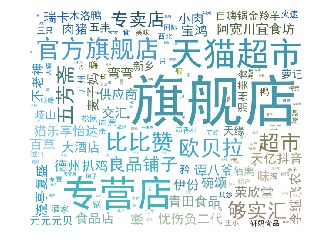

In [20]:
#####
# 词云图
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import numpy as np # numpy数据处理库
import matplotlib.pyplot as plt # 图像展示库
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mask = np.array(Image.open('E:\qqsj\ms\背景2.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='SimHei.ttf', # 设置字体格式
    background_color="white",  # 背景颜色
    mask=mask, # 设置背景图
    max_words=150, # 最多显示词数
    max_font_size=130, # 字体最大值
    random_state=50,  # 设置有多少种随机生成状态，即有多少种配色
    width=2500, height=1920,
    margin=3,  # 设置图片默认的大小,margin为词语边缘距离
)
wc.generate_from_frequencies(word_counts) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.axis("off")  

plt.imshow(wc) # 显示词云

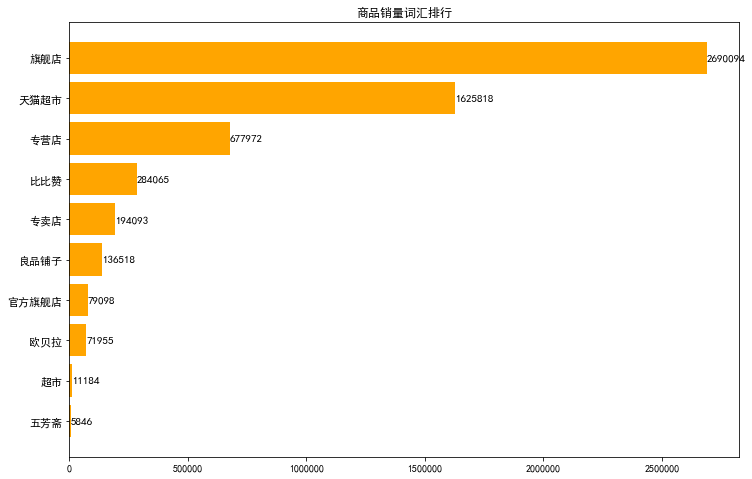

In [21]:
#####
# 销量统计
import numpy as np
title = data.shop.values.tolist()  # 转为list
title_s = []
for line in title:#【】title转为二维list：title_s
    title_cut = jieba.lcut(line)
    title_s.append(title_cut)
ws_sum2 = []
for w in word_count.word:
    i = 0
    s_list = []
    for t in title_s:
        if w in t:
            s_list.append(data.deal[i])
        i += 1
    ws_sum2.append(sum(s_list))
  

df_sum = pd.DataFrame({'ws_sum2': ws_sum2})#把列表ws_sum2转为数据框
df_word_sum = pd.concat([word_count, df_sum], axis=1, ignore_index=True)

df_word_sum.columns = ['word', 'count', 'ws_sum2']  # 词语，出现次数，包含该词语的商品销量

df_word_sum.drop(8, axis=0, inplace=True)  # 删除“空格”词所在的8行
df_word_sum.sort_values('ws_sum2', inplace=True, ascending=True)  # 升序排列
df_ws = df_word_sum.tail(80)

index = np.arange(df_ws.word.size)
plt.figure(figsize=(12, 8))
plt.barh(index, df_ws.ws_sum2, align='center',color='orange',)
plt.yticks(index, df_ws.word, fontsize=11)

# 添加数据标签
for y, x in zip(index, df_ws.ws_sum2):
    plt.text(x, y, '%.0f' % x, ha='left', va='center',
             fontsize=11)  # ha参数有【center，left，right】，va参数有【top，bottom，center，baseline】
    
plt.title('商品销量词汇排行',fontsize=12)
plt.savefig('店铺销量词汇排行.png')


In [21]:
import pandas as pd
data = {
         'nan':['旗舰店','专营店','天猫超市','官方旗舰店','比比赞','欧贝拉','超市','五芳斋','够实汇','专卖店','良品铺子'],
        'count（商品数）':['1730','572','441','216','178','163','154','138','137','113','103'],
        'sales(销量)':['2690094','677972','1625818','79098','284065','71955','11184','5846','9820','194093','136518'],
        'sales/count(销量/商品 比)':['1554','1185','3687','366','1595','441','72','42','71','1717','1325'],
       # '年龄':[20,21,25,24,29]
}
df = pd.DataFrame(data,index=['0','1','2','3','4','5','6','7','8','9','10'],columns=[ 'nan','count（商品数）','sales(销量)','sales/count(销量/商品 比)'])
df


,nan,count（商品数）,sales(销量),sales/count(销量/商品 比)
0,旗舰店,1730,2690094,1554
1,专营店,572,677972,1185
2,天猫超市,441,1625818,3687
3,官方旗舰店,216,79098,366
4,比比赞,178,284065,1595
5,欧贝拉,163,71955,441
6,超市,154,11184,72
7,五芳斋,138,5846,42
8,够实汇,137,9820,71
9,专卖店,113,194093,1717


In [22]:
object_list

['天悦',
 '名坊',
 '杭州',
 '特产',
 '豆腐皮',
 '即食',
 '素食',
 '佛家',
 '纯素',
 '肉素',
 '烧鹅',
 '素肠',
 '豆制品',
 '自热',
 '米饭',
 '速食',
 '冲泡',
 '米',
 '快餐',
 '免',
 '蒸煮',
 '即食',
 '泡饭',
 '宿舍',
 '份量',
 '脂肪',
 '袋',
 '桂林',
 '米粉',
 '正宗',
 '速食',
 '鲜',
 '米线',
 '袋装',
 '螺蛳',
 '粉湿',
 '米粉',
 '广西',
 '鲜',
 '米粉',
 '特产',
 '商用',
 '卤味',
 '觉醒',
 '慢烤',
 '鸡胸肉',
 '干',
 '辣味',
 '吃货',
 '办公室',
 '鸡',
 '肉脯',
 '夜宵',
 '低脂',
 '轻卡自',
 '嗨',
 '锅',
 '自热',
 '米饭',
 '煲仔饭',
 '懒人',
 '速食',
 '早餐',
 '午餐',
 '夜宵',
 '即食',
 '快餐',
 '料理',
 '轩妈家',
 '蛋黄',
 '酥',
 '礼盒',
 '雪媚娘',
 '糕点',
 '点心',
 '休闲',
 '早餐',
 '大礼包',
 '送礼',
 '首发',
 '开小灶',
 '东北',
 '辣白菜',
 '自热',
 '米饭',
 '速食',
 '盒装',
 '整箱',
 '即食',
 '煲仔饭',
 '轩妈家',
 '蛋黄',
 '酥',
 '糕点',
 '雪媚娘',
 '办公室',
 '点心',
 '甜品',
 '休闲',
 '早餐',
 '王小',
 '卤',
 '虎皮',
 '凤爪',
 '鸡',
 '爪子',
 '卤味',
 '五香',
 '休闲',
 '囤货',
 '装',
 '康师傅',
 '方便面',
 '桶装',
 '泡面',
 '整箱',
 '批发',
 '红烧',
 '牛肉面',
 '香辣',
 '老坛',
 '酸菜',
 '速食',
 '康师傅',
 '方便面',
 '泡面',
 '整箱',
 '袋装',
 '红烧',
 '牛肉面',
 '老坛',
 '酸菜',
 '藤椒',
 '批发',
 '速食',
 '良品',
 '铺子',
 '蛋黄',
 '酥雪媚娘',
 '网红',
 '休闲',
 '早餐